*IMPORTANT NOTICE*

This notebook was developed in google colab, using the colab disk space to store data. This can manipulated using bash commands, which for convience can be operated from within the notebook and are delineated clearly with exclamation marks. (e.g ! bash command)

For the model building I used the A100 GPU on colab, the following code cell shows the details of the GPU.

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Mar 27 17:10:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off |   00000000:00:04.0 Off |                    0 |
| N/A   30C    P0             45W /  400W |       0MiB /  40960MiB |      0%      Default |
|                                         |                        |             Disabled |
+-----------------------------------------+-----

# **Binary Training - RGB**

In [ ]:
#Import standard libraries and imageio to read in the images
import imageio.v3 as imageio

# Import numpy/itertools for array/maths calculations
import numpy as np
import itertools

# Import matplotlib to plot graphs etc.
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

# Import pandas to manage datasets
import pandas as pd

# Import os/path lib to navigate the colab directory.
import os
import pathlib

# Import tensorflow and keras machine learning libraries
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

# Import scikit metrics to evaluate models
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import google drive mounting module
from google.colab import drive

In [ ]:
# Mount Google Drive at the default location
drive.mount('/content/drive', force_remount=False)
# Define the path to your desired folder
path = '/content/drive/My Drive/2024-2025/PHAS0056/Code'
# Change to that directory
os.chdir(path)
# Verify the current working directory
print("Current Directory:", os.getcwd())

Mounted at /content/drive
Current Directory: /content/drive/My Drive/2024-2025/PHAS0056/Code


In [ ]:
# Bash command to unzip the dataset
! unzip -qq fireNoFire.zip -d /data

In [ ]:
# Go to the root directory
os.chdir('/')

# Create new direcory
new_dir = os.path.join(os.getcwd(), 'Ternary')
os.makedirs(new_dir)

# Move to new directory
os.chdir('/Ternary/')

# Create  more new direcories
new_dir = os.path.join(os.getcwd(), 'Training')
os.makedirs(new_dir)
new_dir = os.path.join(os.getcwd(), 'Test')
os.makedirs(new_dir)

# Create  more new direcories inside /Training
os.chdir('/Ternary/Training')
new_dir = os.path.join(os.getcwd(), 'Lake')
os.makedirs(new_dir)
new_dir = os.path.join(os.getcwd(), 'No_Fire')
os.makedirs(new_dir)


# Create  more new direcories inside /Training
os.chdir('/Ternary/Test')
new_dir = os.path.join(os.getcwd(), 'Lake')
os.makedirs(new_dir)
new_dir = os.path.join(os.getcwd(), 'No_Fire')
os.makedirs(new_dir)

In [ ]:
# Copy the test data labelled as 'Fire' to the new Binary/ directory
! cp -r /data/Training/Fire/ /Ternary/Training/
! cp -r /data/Test/Fire /Ternary/Test/

In [ ]:
# Copy over manually selected non-lake images labelled lake
os.chdir('/Ternary/Training/No_Fire')

!for i in {822..2257}; do cp "/data/Training/No_Fire/lake_resized_lake_frame$i.jpg" "/Ternary/Training/No_Fire/lake_resized_lake_frame$((i + 1)).jpg"; done

!for i in {3353..5774}; do cp "/data/Training/No_Fire/lake_resized_lake_frame$i.jpg" "/Ternary/Training/No_Fire/lake_resized_lake_frame$((i + 1)).jpg"; done

!for i in {6056..6656}; do cp "/data/Training/No_Fire/lake_resized_lake_frame$i.jpg" "/Ternary/Training/No_Fire/lake_resized_lake_frame$((i + 1)).jpg"; done

!for i in {7837..7895}; do cp "/data/Training/No_Fire/lake_resized_lake_frame$i.jpg" "/Ternary/Training/No_Fire/lake_resized_lake_frame$((i + 1)).jpg"; done

!for i in {10323..11293}; do cp "/data/Training/No_Fire/lake_resized_lake_frame$i.jpg" "/Ternary/Training/No_Fire/lake_resized_lake_frame$((i + 1)).jpg"; done

!for i in {0..400}; do cp "/data/Test/No_Fire/resized_test_nofire_frame$i.jpg" "/Ternary/Training/No_Fire/resized_test_nofire_frame$((i + 1)).jpg"; done


# Copy original training no fire data to new directory
! cp /data/Training/No_Fire/resized_frame* /Ternary/Training/No_Fire/
! cp -r /data/Test/No_Fire /Ternary/Test/

# Copy over manually selected non-lake images labelled lake
os.chdir('/Ternary/Test/No_Fire')

!for i in {11377..11846}; do cp "/data/Training/No_Fire/lake_resized_lake_frame$i.jpg" "/Ternary/Test/No_Fire/lake_resized_lake_frame$((i + 1)).jpg"; done

In [ ]:
# Copy over lake images
os.chdir('/Ternary/Training/Lake')

!for i in {0..821}; do cp "/data/Training/No_Fire/lake_resized_lake_frame$i.jpg" "/Ternary/Training/Lake/lake_resized_lake_frame$((i + 1)).jpg"; done
#821

!for i in {2258..2696}; do cp "/data/Training/No_Fire/lake_resized_lake_frame$i.jpg" "/Ternary/Training/Lake/lake_resized_lake_frame$((i + 1)).jpg"; done
#438

!for i in {2697..3352}; do cp "/data/Training/No_Fire/lake_resized_lake_frame$i.jpg" "/Ternary/Training/Lake/lake_resized_lake_frame$((i + 1)).jpg"; done
#655


!for i in {6678..7077}; do cp "/data/Training/No_Fire/lake_resized_lake_frame$i.jpg" "/Ternary/Training/Lake/lake_resized_lake_frame$((i + 1)).jpg"; done
#219

!for i in {7078..7431}; do cp "/data/Training/No_Fire/lake_resized_lake_frame$i.jpg" "/Ternary/Training/Lake/lake_resized_lake_frame$((i + 1)).jpg"; done
#353

!for i in {7897..10322}; do cp "/data/Training/No_Fire/lake_resized_lake_frame$i.jpg" "/Ternary/Training/Lake/lake_resized_lake_frame$((i + 1)).jpg"; done
#2425


os.chdir('/Ternary/Test/Lake')


!for i in {6657..6877}; do cp "/data/Training/No_Fire/lake_resized_lake_frame$i.jpg" "/Ternary/Test/Lake/lake_resized_lake_frame$((i + 1)).jpg"; done
#200

!for i in {7432..7835}; do cp "/data/Training/No_Fire/lake_resized_lake_frame$i.jpg" "/Ternary/Test/Lake/lake_resized_lake_frame$((i + 1)).jpg"; done
#403

!for i in {11294..11376}; do cp "/data/Training/No_Fire/lake_resized_lake_frame$i.jpg" "/Ternary/Test/Lake/lake_resized_lake_frame$((i + 1)).jpg"; done
#82

!for i in {5774..6055}; do cp "/data/Training/No_Fire/lake_resized_lake_frame$i.jpg" "/Ternary/Training/Lake/lake_resized_lake_frame$((i + 1)).jpg"; done
#281


In [ ]:
# A non default batch size is used to address potential data imbalances (confirmed to present later)
# Define the batch size for the dataset
batch_size = 64

# Define the raw image dimensions
img_height = 254
img_width = 254

In [ ]:
# Move to root directory and define training images path
os.chdir('/')
data_dir = pathlib.Path('Ternary/Training')

# Use keras to load the raw training data, defining the validation split and assining binary labels to the data
raw_train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels="inferred",
  label_mode='int',
  validation_split=0.2,
  subset="training",
  color_mode='rgb',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 38797 files belonging to 3 classes.
Using 31038 files for training.


In [ ]:
# Define the path for training images
data_dir = pathlib.Path('Ternary/Training')

# Use keras to load the raw validation data, defining the validation split and assigning multiclass labels to the data
raw_val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels="inferred",
  label_mode='int',
  validation_split=0.2,
  subset="validation",
  color_mode='rgb',
  seed=456,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 38797 files belonging to 3 classes.
Using 7759 files for validation.


In [ ]:
# Define the path for testing images
data_dir = pathlib.Path('Ternary/Test')

# Use keras to load the raw test data, defining the validation split and assigning multiclass labels to the data
raw_test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  labels="inferred",
  label_mode='int',
  color_mode='rgb',
  seed=456,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle=False)

Found 9795 files belonging to 3 classes.


In [ ]:
# Get the class names
class_names = raw_train_ds.class_names
num_classes = len(class_names)

print('Class names:',class_names)


Class names: ['Fire', 'Lake', 'No_Fire']


Fire, Count: 19957
Lake, Count: 4296
No_Fire, Count: 6785
Total Images: 31038
Percentage of images with Fire: 64.29860171402797%
Percentage of images with Lake: 13.841098008892324%
Percentage of images with No Fire: 21.86030027707971%


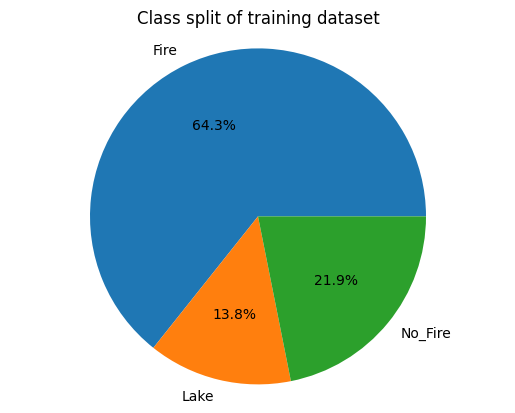

In [ ]:
# Initialize counters for all classes
Fire_count = 0
Lake_count = 0
No_Fire_count = 0


for images, labels in raw_train_ds:
    # Convert labels to integers
    labels = labels.numpy().astype(int).flatten()

    # Count how many labels of each class in the batch
    Fire_count += np.sum(labels == 0)
    Lake_count += np.sum(labels == 1)
    No_Fire_count += np.sum(labels == 2)

# Sum the total count
Total = Fire_count + Lake_count + No_Fire_count

# Print out the counts
print(f"{class_names[0]}, Count: {Fire_count}")
print(f"{class_names[1]}, Count: {Lake_count}")
print(f"{class_names[2]}, Count: {No_Fire_count}")
print(f"Total Images: {Total}")

# Now calculate the percentages of both classes
percent_Fire = Fire_count / Total
percent_Lake = Lake_count /Total
percent_No_Fire = No_Fire_count / Total
# Print the percentages
print(f'Percentage of images with Fire: {percent_Fire*100}%')
print(f'Percentage of images with Lake: {percent_Lake*100}%')
print(f'Percentage of images with No Fire: {percent_No_Fire*100}%')

sizes = [ percent_Fire,percent_Lake,percent_No_Fire]

plt.pie(sizes, labels=class_names, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Class split of training dataset')
plt.show()


In [ ]:
weight_for_0 = (1 / Fire_count) * (Total / 2.0)
weight_for_1 = (1 / Lake_count) * (Total / 2.0)
weight_for_2 = (1 / No_Fire_count) * (Total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}

print(class_weight)

{0: np.float64(0.777621887057173), 1: np.float64(3.6124301675977653), 2: np.float64(2.287251289609433)}


Fire, Count: 4953
Lake, Count: 1111
No_Fire, Count: 1695
Total Images: 7759
Percentage of images with Fire: 63.83554581776002%
Percentage of images with Lake: 14.318855522618895%
Percentage of images with No Fire: 21.845598659621086%


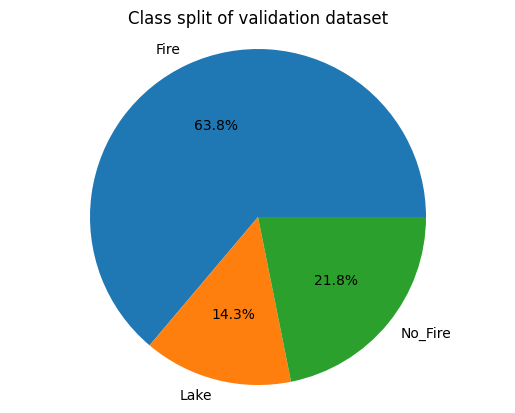

In [ ]:
# Initialize counters for both classes
Fire_count_val = 0
Lake_count_val = 0
No_Fire_count_val = 0


for images, labels in raw_val_ds:
    # Convert labels to integers (0 or 1)
    labels = labels.numpy().astype(int).flatten()

    # Count how many labels are 0 and how many are 1 in the batch
    Fire_count_val += np.sum(labels == 0)
    Lake_count_val += np.sum(labels == 1)
    No_Fire_count_val += np.sum(labels == 2)

Total_val = Fire_count_val + Lake_count_val + No_Fire_count_val

# Print out the counts
print(f"{class_names[0]}, Count: {Fire_count_val}")
print(f"{class_names[1]}, Count: {Lake_count_val}")
print(f"{class_names[2]}, Count: {No_Fire_count_val}")
print(f"Total Images: {Total_val}")

# Now calculate the percentages of both classes
percent_Fire_val = Fire_count_val / Total_val
percent_Lake_val = Lake_count_val /Total_val
percent_No_Fire_val = No_Fire_count_val / Total_val
# Print the percentages
print(f'Percentage of images with Fire: {percent_Fire_val*100}%')
print(f'Percentage of images with Lake: {percent_Lake_val*100}%')
print(f'Percentage of images with No Fire: {percent_No_Fire_val*100}%')

sizes_val = [ percent_Fire_val,percent_Lake_val,percent_No_Fire_val]

plt.pie(sizes_val, labels=class_names, autopct='%1.1f%%')
plt.title('Class split of validation dataset')
plt.axis('equal')
plt.show()


Fire, Count: 5137
Lake, Count: 708
No_Fire, Count: 3950
Total Images: 31038
Percentage of images with Fire: 52.445125063808064%
Percentage of images with Lake: 7.228177641653905%
Percentage of images with No Fire: 40.32669729453803%


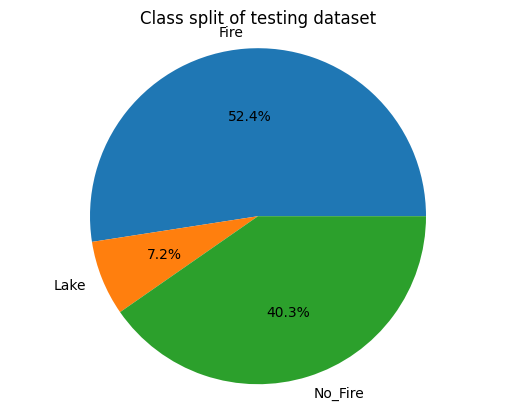

In [ ]:
# Initialize counters for both classes
Fire_count_test = 0
Lake_count_test = 0
No_Fire_count_test = 0


for images, labels in raw_test_ds:
    # Convert labels to integers (0 or 1)
    labels = labels.numpy().astype(int).flatten()

    # Count how many labels are 0 and how many are 1 in the batch
    Fire_count_test += np.sum(labels == 0)
    Lake_count_test += np.sum(labels == 1)
    No_Fire_count_test += np.sum(labels == 2)

# Sum the total count
Total_test = Fire_count_test + Lake_count_test + No_Fire_count_test

# Print out the counts
print(f"{class_names[0]}, Count: {Fire_count_test}")
print(f"{class_names[1]}, Count: {Lake_count_test}")
print(f"{class_names[2]}, Count: {No_Fire_count_test}")
print(f"Total Images: {Total}")

# Now calculate the percentages of both classes
percent_Fire_test = Fire_count_test / Total_test
percent_Lake_test = Lake_count_test /Total_test
percent_No_Fire_test = No_Fire_count_test / Total_test
# Print the percentages
print(f'Percentage of images with Fire: {percent_Fire_test*100}%')
print(f'Percentage of images with Lake: {percent_Lake_test*100}%')
print(f'Percentage of images with No Fire: {percent_No_Fire_test*100}%')

# Store percentages in a list
sizes_test = [ percent_Fire_test,percent_Lake,percent_No_Fire_test]

# Plot of a pie chart of data split
plt.pie(sizes_test, labels=class_names, autopct='%1.1f%%')
plt.title('Class split of testing dataset')
plt.axis('equal')
plt.show()


In [ ]:
test_labels = []

for images, labels in raw_test_ds:
    # Convert labels to integers (0 or 1)
    labels = labels.numpy().astype(int).flatten()
    test_labels.extend(labels)

In [ ]:
print(len(test_labels))

9795


In [ ]:
# Use the inbuilt tensforflow optimisation algorithm for prefetching and parallel calls
AUTOTUNE = tf.data.AUTOTUNE

# Define an augmentation function
def augmentation(ds):
    '''
    Apply data augmentation techniques to an image dataset.

    Inputs:
     ds: TensorFlow dataset, the input dataset containing images.
     IMG_SIZE: int, size to which images will be resized (not used in function but typically relevant for preprocessing).

    Returns:
     ds: TensorFlow dataset, the augmented dataset with transformations applied.
    '''

    data_augmentation = tf.keras.Sequential([
        # Randomly rotate the images between -0.5 to 0.5 times 2pi
        keras.layers.RandomRotation(0.5),
        # Randomly flip the images
        keras.layers.RandomFlip("horizontal_and_vertical"),
        # Randomly change the contrast of the images
        keras.layers.RandomContrast(0.2, value_range=(0, 255)),
        # Randomly change the brightness of images
        keras.layers.RandomBrightness(0.2, value_range=(0, 255)),
        # Randomly degenerate RGB values
        keras.layers.RandomColorDegeneration(0.2, value_range=(0, 255))
    ])

    # Apply the augmentation to the input images
    ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y),
                num_parallel_calls=AUTOTUNE)

    # Return augmentated data
    return ds

def prepare(ds, IMG_SIZE, shuffle=False, augment=False, resize=False,cache=False):
    '''
    Prepares a TensorFlow dataset with optional shuffling, augmentation, and resizing.

    Inputs:
     ds: TensorFlow dataset, the input dataset containing images.
     IMG_SIZE: int, size to which images will be resized (if resize=True).
     shuffle: bool, whether to shuffle the dataset.
     augment: bool, whether to apply data augmentation.
     resize: bool, whether to resize images to (IMG_SIZE, IMG_SIZE).

    Returns:
     ds: TensorFlow dataset, the processed dataset with applied transformations.
    '''

    # Option to shuffle the data
    if shuffle:
        ds = ds.shuffle(reshuffle_each_iteration=True)

    # Option to augment the data
    if augment:
        ds = augmentation(ds)

    # Option to resize the data
    if resize:
        ds = ds.map(lambda x, y: (tf.image.resize(x, (IMG_SIZE, IMG_SIZE)), y),
                    num_parallel_calls=AUTOTUNE)

    # Option to cache data
    if cache:
        ds = ds.cache()

    # Apply prefetching quality to the dataset
    ds = ds.prefetch(buffer_size=AUTOTUNE)

    # Return the prepared dataset
    return ds


In [ ]:
def visualize_samples(dataset, class_names, num_images=9, grid_size=(3, 3), figsize=(10, 10)):
    '''
    Visualizes a batch of images from a TensorFlow dataset.

    Inputs:
     dataset: TensorFlow dataset, the dataset containing image-label pairs.
     class_names: list, class labels corresponding to dataset categories.
     num_images: int, number of images to display (default: 9).
     grid_size: tuple, shape of the image grid (default: (3, 3)).
     figsize: tuple, figure size for visualization (default: (10, 10)).

    Returns:
     None (displays the images in a matplotlib figure).
    '''

    #  Create figure
    plt.figure(figsize=figsize)

    # Use for loop to plot
    for images, labels in dataset.take(1):
        # For loop to take num_images
        for i in range(min(num_images, images.shape[0])):
            # Set location of plot on figure
            ax = plt.subplot(grid_size[0], grid_size[1], i + 1)
            # Display the image
            plt.imshow(images[i].numpy().astype("uint8"))
            # Add class names and remove axis
            plt.title(class_names[int(labels[i])])
            plt.axis("off")
    plt.show()


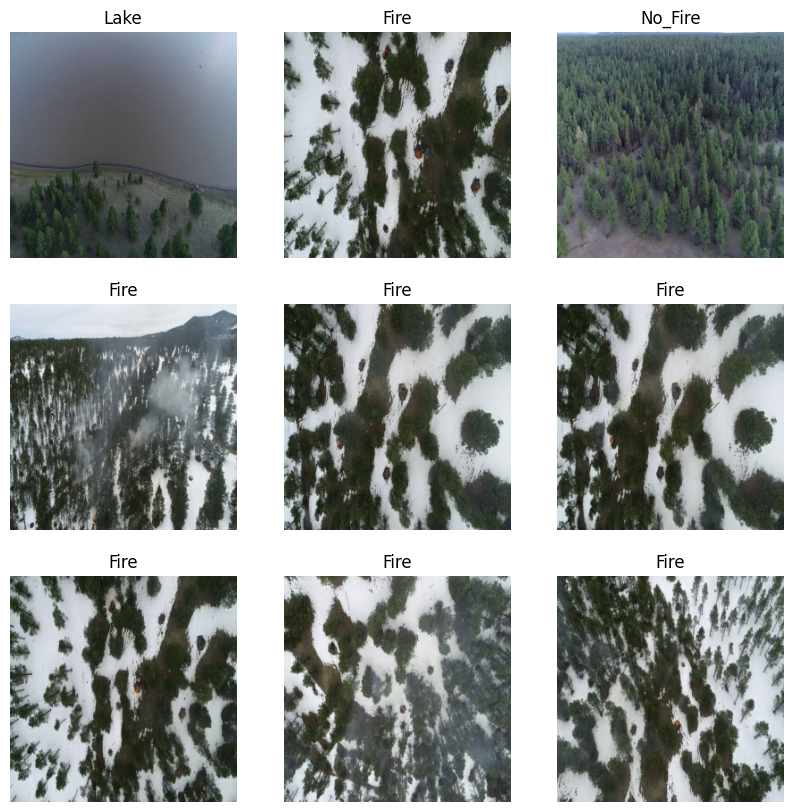

In [ ]:
visualize_samples(raw_train_ds, class_names)

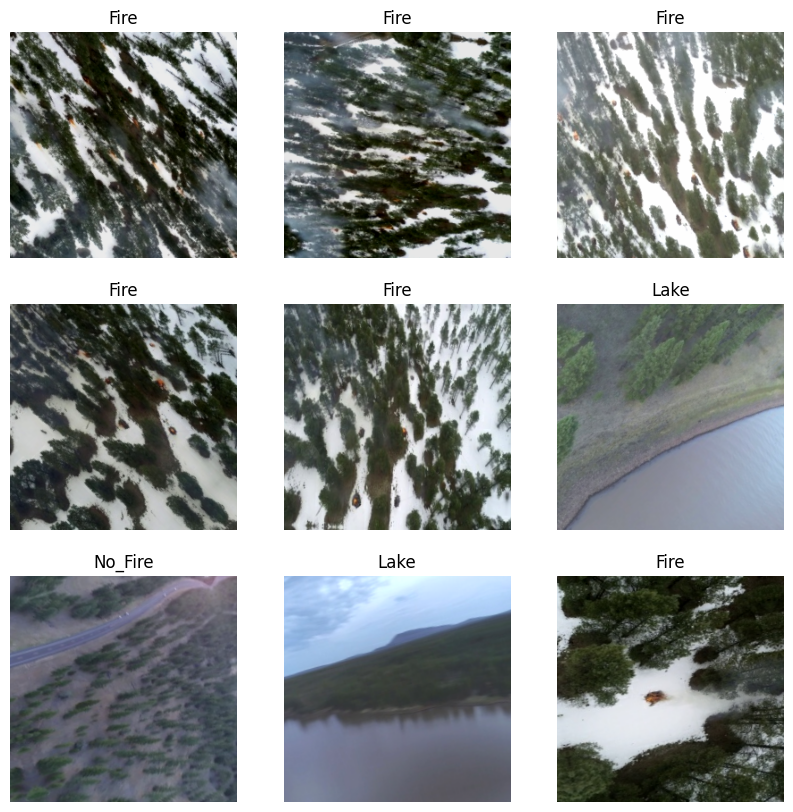

In [ ]:
IMG_SIZE = 254

aug_train_ds = prepare(raw_train_ds,IMG_SIZE,augment=True)

visualize_samples(aug_train_ds, class_names)


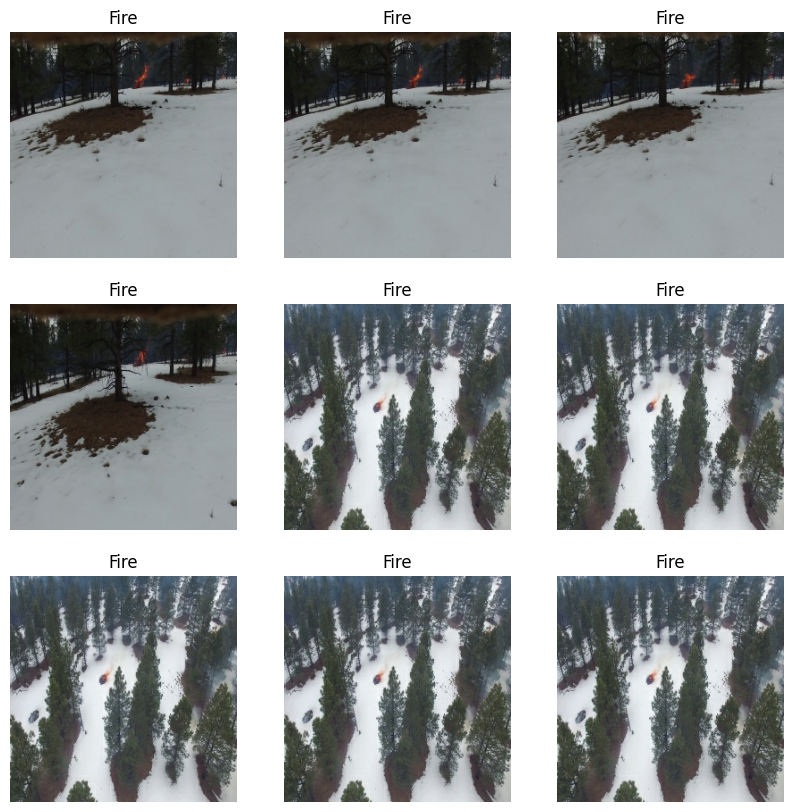

In [ ]:
visualize_samples(raw_test_ds, class_names)

In [ ]:
# Define function to reset weights for a model

def reset_weights(model):
    '''
    Resets the weights of a given Keras model.

    Inputs:
     model: Keras model, the model whose weights need to be reset.

    Returns:
     None (resets model weights in place).
    '''
    # Use for loop to apply to all layers in given model
    for layer in model.layers:
       if hasattr(layer, 'kernel_initializer'):
          layer.kernel.assign(layer.kernel_initializer(layer.kernel.shape))

# Define function which trains a model for n epochs with the option for class weighting

def train(model, train_ds, val_ds, epochs, class_weight=None):
    '''
    Trains a given Keras model.

    Inputs:
     model: Keras model, the model to train.
     train_ds: TensorFlow dataset, training dataset.
     val_ds: TensorFlow dataset, validation dataset.
     epochs: int, number of training epochs.
     class_weight: dict (optional), class weight mapping for handling imbalanced data.

    Returns:
     history: Keras History object, containing training metrics.
    '''

    # Option to use weighting
    if class_weight is None:
        hist = model.fit(train_ds,
                         validation_data=val_ds,
                         epochs=epochs)
    else:
        hist = model.fit(train_ds,
                         validation_data=val_ds,
                         epochs=epochs,
                         class_weight=class_weight)
    # Return training history
    return hist


def plot_training_ternary(history, modelname, epochs):
    '''
    Plots the training and validation accuracy and loss curves.

    Inputs:
     history: Keras History object, the history object from training the model.
     modelname: str, the name of the model to be used in the plot title.
     epochs: int, number of epochs used in the training.

    Returns:
     None (displays and saves training and validation accuracy/loss curves).
    '''

    # Extract training and validation loss values from history
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Extract training and validation accuracy values from history
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epoch_range = range(epochs)

    # Create subplots: one for accuracy, one for loss
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plot training and validation accuracy
    ax[0].plot(epoch_range, acc, label='Training Accuracy')
    ax[0].plot(epoch_range, val_acc, label='Validation Accuracy')
    ax[0].set_title('Accuracies')
    ax[0].legend(edgecolor='1')

    # Plot training and validation loss
    ax[1].plot(epoch_range, loss, label='Training Loss')
    ax[1].plot(epoch_range, val_loss, label='Validation Loss')
    ax[1].set_title('Losses')
    ax[1].legend(edgecolor='1')

    # Set title for the entire figure
    name = str(modelname)
    plt.suptitle(f'Training Metrics For {name}')

    # Save the plots as PNG and SVG files
    plt.savefig(f'training.png')
    plt.savefig(f'training.svg')

    # Display the plot
    plt.show()


def train_ternary(model, modelname, train_ds, val_ds, epochs, class_weight=None):
    '''
    Trains a model and plots the training/validation metrics.

    Inputs:
     model: Keras model, the model to train.
     modelname: str, the name of the model.
     train_ds: TensorFlow dataset, training dataset.
     val_ds: TensorFlow dataset, validation dataset.
     epochs: int, number of epochs for training.
     class_weight: dict (optional), class weights for handling class imbalance.

    Returns:
     history: Keras History object, containing training and validation metrics.
    '''

    # Train the model using the provided datasets and epochs
    history = train(model, train_ds, val_ds, epochs, class_weight)

    # Plot the training and validation metrics (accuracy and loss)
    plot_training_ternary(history, modelname, epochs)

    return history


In [ ]:
def ternary_evaluation(ds, class_names, modelname, title=None):
    '''
    Evaluates the model on the test dataset and plots the confusion matrix.

    Inputs:
     ds: TensorFlow dataset, test dataset containing images and labels.
     class_names: list, the names of the classes (e.g., ['Class 1', 'Class 2', 'Class 3']).
     modelname: Keras model, the trained model to evaluate.
     title: str, optional, title for the confusion matrix plot.

    Returns:
     None (prints evaluation results and displays/confirms confusion matrix plot).
    '''

    # Create empty list to store test labels
    test_labels = []

    # Collect all the labels from the dataset
    for images, labels in ds:
        test_labels.extend(labels.numpy())  # Convert labels to numpy and append to test_labels

    print("Evaluate on test data")
    results = modelname.evaluate(ds, return_dict=True)
    print("test loss, test acc:", results)

    predictions = modelname.predict(ds)  # Get the model's predictions on the test data

    # Convert predictions to class indices (for ternary classification)
    predicted_classes = np.argmax(predictions, axis=1)

    # Generate the confusion matrix
    cm = confusion_matrix(y_true=test_labels, y_pred=predicted_classes)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)

    # Set the title of the plot (if provided)
    if title:
        plt.title(title)

    # Save the confusion matrix plot as an SVG file
    plt.savefig(f'Confusion.svg')

    # Display the confusion matrix plot
    plt.show()


In [ ]:
def plot_ROC_curve(modelname, test_ds, test_labels, title=None):
    '''
    Plots the ROC curve for each class in a multi-class classification problem.

    Inputs:
     modelname: Keras model, the trained model to evaluate.
     test_ds: TensorFlow dataset, test dataset containing features and labels.
     test_labels: Array-like, true class labels (not one-hot encoded).
     title: str, optional, title for the ROC curve plot.

    Returns:
     None (displays and saves ROC curves for all classes).
    '''

    # Get model predictions (probabilities for each class)
    pred = modelname.predict(test_ds)

    # Get the number of classes
    n_classes = pred.shape[1]  # Number of classes (columns in prediction)

    # Initialize dictionaries to store fpr, tpr, and roc_auc values for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Compute ROC curve and AUC for each class
    for i in range(n_classes):
        # Compute ROC curve for each class, treating each class as the positive class
        fpr[i], tpr[i], threshold = roc_curve(test_labels, pred[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Create the plot for all classes
    plt.figure(figsize=(10, 6))

    # Cycle through colors for each class
    colors = itertools.cycle(['orange', 'blue', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of {class_names[i]} class (area = {roc_auc[i]:0.2f})')

    # Plot the no skill line
    plt.plot([0, 1], [0, 1], 'k--', lw=2, label='No Skill')

    # Set plot limits and labels
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right",edgecolor='1')

    # Save the plot
    plt.savefig(f'ROC.png')
    plt.savefig(f'ROC.svg')

    # Show the plot
    plt.show()

In [ ]:
# Prepare training/validation datasets
train_ds = prepare(raw_train_ds,IMG_SIZE,augment=True,cache=True)
val_ds = prepare(raw_val_ds,IMG_SIZE)

In [ ]:
# Define metrics
METRICS = [
      keras.metrics.F1Score(name='f1_score',threshold=(0.5)),
      keras.metrics.AUC(name='auc'),
]

## **Model Training**

In [ ]:
def make_model(summarise=False):
    '''
    Build and compile a CNN model for multi-class classification.


    Inputs:
     summarise: str, if '1', it prints the model summary. Default is 'False'.

    Returns:
     model: Compiled Keras model ready for training.
    '''

    model = keras.Sequential([
        keras.layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
        keras.layers.Conv2D(32, 3, padding='same'),
        keras.layers.LeakyReLU(alpha=0.1),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(64, 3, padding='same'),
        keras.layers.LeakyReLU(alpha=0.1),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(64, 3, padding='same'),
        keras.layers.LeakyReLU(alpha=0.1),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(32, 3, padding='same'),
        keras.layers.LeakyReLU(alpha=0.1),
        keras.layers.BatchNormalization(),
        keras.layers.MaxPooling2D(),
        keras.layers.Flatten(),
        keras.layers.Dense(32),
        keras.layers.LeakyReLU(alpha=0.1),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(3)
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    if summarise == 1:
        model.summary()
        return model
    else:
        return model


In [ ]:
model = make_model(1)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)              │ (None, 254, 254, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_30 (LeakyReLU)           │ (None, 254, 254, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 127, 127, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_31 (LeakyReLU)           │ (None, 127, 127, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 127, 127, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 63, 63, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_32 (LeakyReLU)           │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 63, 63, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 31, 31, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_33 (LeakyReLU)           │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 31, 31, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │         230,432 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 306,083 (1.17 MB)

 Trainable params: 305,699 (1.17 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
reset_weights(model)

Epoch 1/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 75s 124ms/step - accuracy: 0.8408 - loss: 0.8665 - val_accuracy: 0.4998 - val_loss: 1.2103
Epoch 2/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9319 - loss: 0.3361 - val_accuracy: 0.5564 - val_loss: 1.7594
Epoch 3/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9462 - loss: 0.2523 - val_accuracy: 0.6965 - val_loss: 1.1742
Epoch 4/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9571 - loss: 0.1994 - val_accuracy: 0.6949 - val_loss: 0.7928
Epoch 5/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9704 - loss: 0.1251 - val_accuracy: 0.7652 - val_loss: 0.6557
Epoch 6/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9719 - loss: 0.1236 - val_accuracy: 0.9718 - val_loss: 0.0901
Epoch 7/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9790 - loss: 0.0892 - val_accuracy: 0.9742 - val_loss: 0.0889
Epoch 8/100
485/485 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.9839 - loss: 

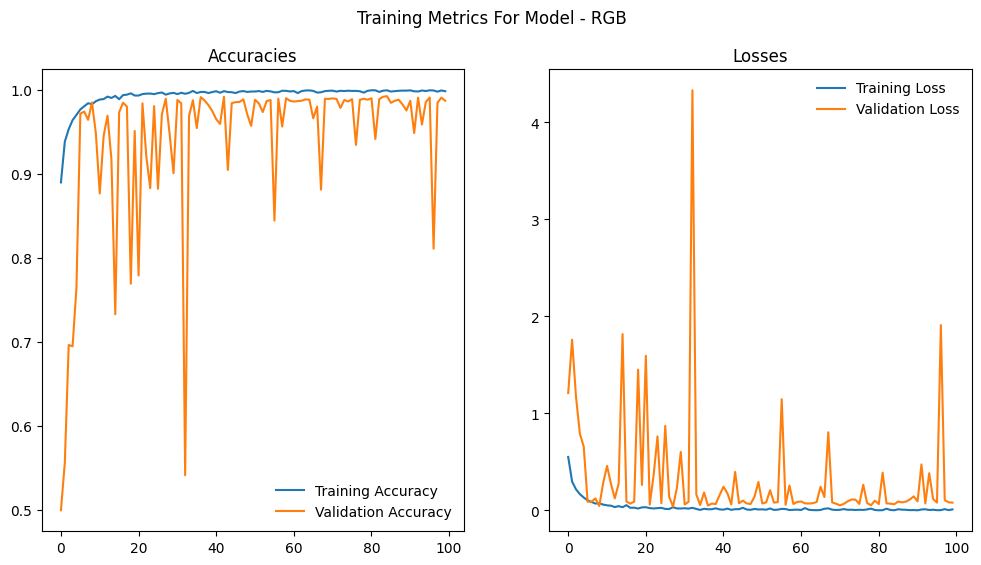

In [ ]:
history = train_ternary(model,'Model - RGB',train_ds,val_ds,100,class_weight)

Evaluate on test data
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7617 - loss: 4.3754
test loss, test acc: {'accuracy': 0.8101071715354919, 'loss': 3.7757370471954346}
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step


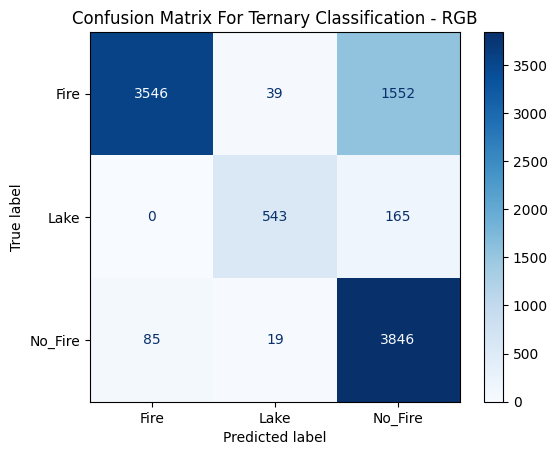

In [ ]:
ternary_evaluation(raw_test_ds,class_names,model,'Confusion Matrix For Ternary Classification - RGB')

154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step


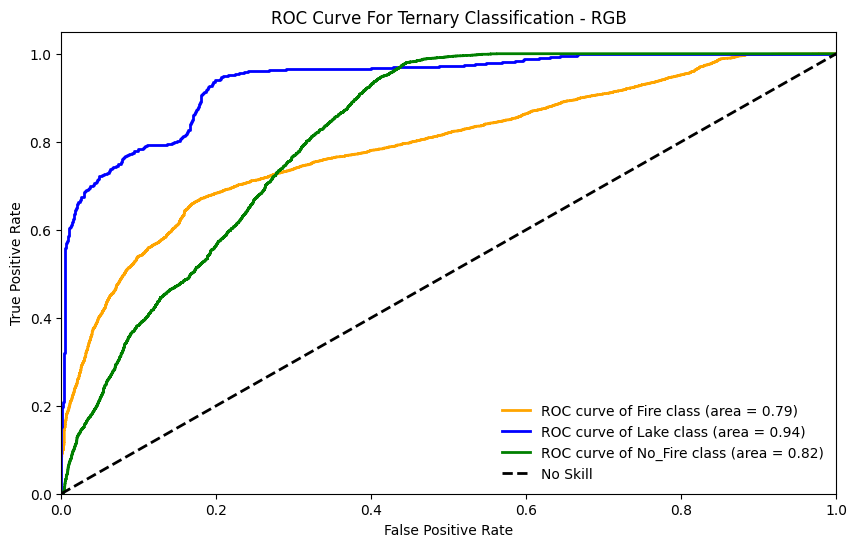

In [ ]:
plot_ROC_curve(model,raw_test_ds,test_labels,'ROC Curve For Ternary Classification - RGB')

In [ ]:
model.save_weights('ternary_weights.weights.h5')